<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 6<a id='top'></a>

- <a href='#section1'>6.1 Fast Fourier transforms</a>
- <a href='#section2'>6.2 Speed of Fast Fourier transforms </a>
- <a href='#section3'>6.3 Image denoising by FFT</a>
- <a href='#section4'>6.4 Discrete Gabor transform </a>
- <a href='#section5'>6.5 Discrete wavelet transform</a>


## 6.1 Fast Fourier transforms<a id='section1'></a>

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey. Press et al. provide an accessible introduction to Fourier analysis and its applications.



### 1-D discrete Fourier transforms

The FFT $y[k]$ of length $N$ of the length-$N$ sequence $x[n]$ is defined as
$$y[k]=\sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N}} x[n]$$
and the inverse transform is defined as follows
$$x[n]=\frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N}} y[k]$$
These transforms can be calculated by means of `fft` and `ifft`, respectively, as shown in the following example.

In [10]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [11]:
yinv = ifft(y)

# complex component are also shown, that is created by `fft()` of `scipy`
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

From the definition of the FFT it can be seen that
$$y[0]=\sum_{n=0}^{N-1} x[n]$$
In the example

In [12]:
np.sum(x)

4.5

which corresponds to $y[0] .$ For $\mathrm{N}$ even, the elements $y[1] \ldots y[N / 2-1]$ contain the positive-frequency terms, and the elements $y[N / 2] \ldots y[N-1]$ contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements $y[1] \ldots y[(N-1) / 2]$ contain the positive-frequency terms, and the elements $y[(N+1) / 2] \ldots y[N-1]$ contain the negative-frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of $y[n]$ for positive frequencies is the conjugate of the values $y[n]$ for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.

The example plots the FFT of the sum of two sines.

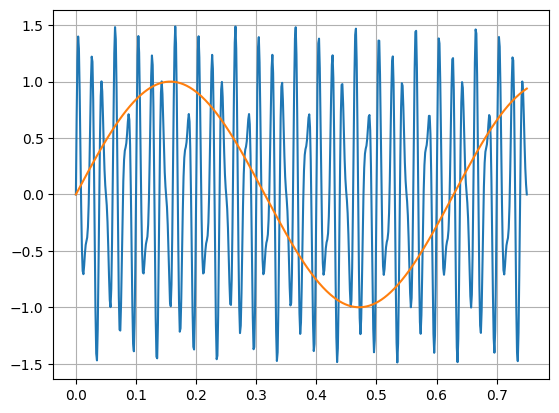

In [13]:
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y1 = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y2=np.sin(10*x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.grid()
plt.show()

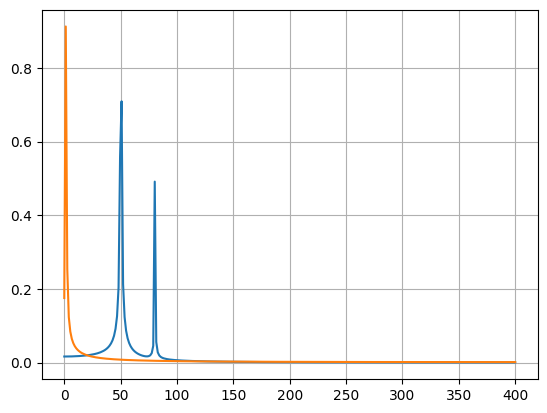

In [14]:
y1f = fft(y1)
y2f = fft(y2)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(y1f[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(y2f[0:N//2]))
plt.grid()
plt.show()

### 2- and N-D discrete Fourier transforms

The functions `fft2` and `ifft2` provide 2-D FFT and IFFT, respectively. Similarly, `fftn` and `ifftn` provide N-D FFT, and IFFT, respectively.

The example below demonstrates a 2-D IFFT and plots the resulting (2-D) time-domain signals.

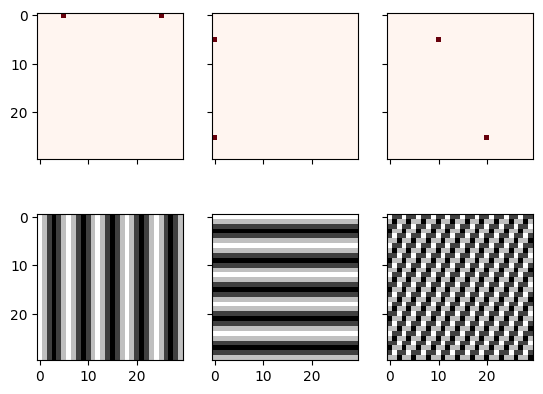

In [15]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30

# initializing the subplots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

# generate 2 dots in a plain n x n graph, and generate its inverse fourier transform
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()


<a href='#top'>jump to the top</a>

## 6.2 Speed of Fast Fourier transforms <a id='section2'></a>

First, we define a function to calculate the Discrete Fourier Transform directly.

In [16]:
import numpy as np
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

We can ensure our implementation is correct by comparing the results with those obtained from scipy's `fft` function.

In [17]:
x = np.random.random(1024)
np.allclose(dft(x), fft(x))

True

As we can clearly see, the Discrete Fourier Transform function is orders of magnitude slower than the Fast Fourier Transform algorithm.

In [18]:
%timeit dft(x)
%timeit fft(x)

42.7 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.59 µs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Like we saw before, the Fast Fourier Transform works by computing the Discrete Fourier Transform for small subsets of the overall problem and then combining the results. The latter can easily be done in code using recursion.

In [19]:
def fft_new(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("must be a power of 2")
    elif N <= 2:
        return dft(x)
    else:
        X_even = fft_new(x[::2])
        X_odd = fft_new(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])


Again, we can validate whether our implementation is correct by comparing the results with those obtained from scipy.

In [20]:
x = np.random.random(1024)
np.allclose(fft_new(x), fft(x))

True

The FFT algorithm is significantly faster than the direct implementation. However, it still lags behind the numpy implementation by quite a bit. One reason for this is the fact that the numpy implementation uses matrix operations to calculate the Fourier Transforms simultaneously.

In [21]:
%timeit dft(x)
%timeit fft_new(x)
%timeit fft(x)

42.8 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.14 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.62 µs ± 89 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


We define another function to compute the Fourier Transform. Only this time around, we make use of vector operations instead of recursion.

In [22]:
def fft_v(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
    return X.ravel()

Once again, we can ensure we obtained the correct results by comparing them with those from the scipy library.


In [23]:
x = np.random.random(1024)
np.allclose(fft_v(x), fft(x))

True

As we can see, the FFT implementation using vector operations is significantly faster than what we had obtained previously. We still haven’t come close to the speed at which the numpy library computes the Fourier Transform. This is because the FFTPACK algorithm behind scipy’s fft is a Fortran implementation which has received years of tweaks and optimizations. If you are interested in finding out more, I recommend you have a look at the source code.


In [24]:
%timeit fft_new(x)
%timeit fft_v(x)
%timeit fft(x)

6.17 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
170 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.59 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<a href='#top'>jump to the top</a>

## 6.3 Image denoising by FFT <a id='section3'></a>

Denoise an image (`moonlanding.png`) by
implementing a blur with an FFT.

Implements, via FFT, the following convolution:

\begin{align}f_1(t) = \int dt'\, K(t-t') f_0(t')\end{align}

\begin{align}\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)\end{align}

Read and plot the image

Text(0.5, 1.0, 'Original image')

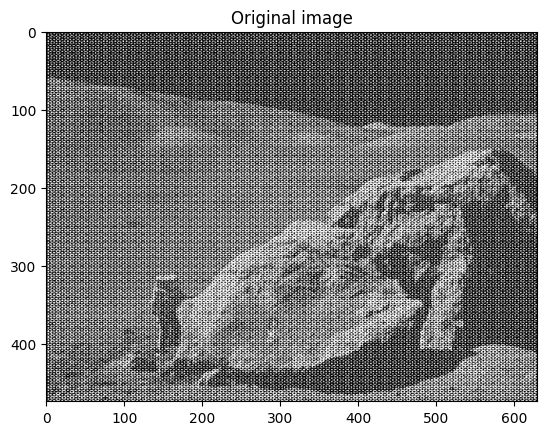

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Compute the 2d FFT of the input image

<Figure size 640x480 with 0 Axes>

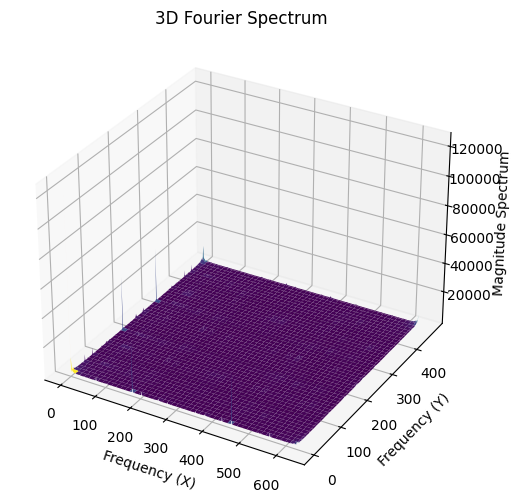

Text(0.5, 1.0, 'Fourier transform')

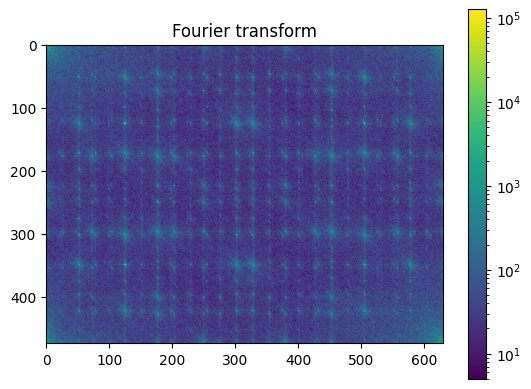

In [71]:
from scipy import fftpack
from scipy.fft import fft2,ifft2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# these two lines are equivalent: 
im_fft = fftpack.fft2(im)
# im_fft = fft2(im)

# Show the results

def plot_spectrum(im_fft):
    # Get the magnitude spectrum
    magnitude_spectrum = np.abs(im_fft)
    
    # Get the dimensions of the spectrum
    rows, cols = magnitude_spectrum.shape
    
    # Create a grid of coordinates for the 3D plot
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    X, Y = np.meshgrid(x, y)
    
    # Create a 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the 3D surface
    ax.plot_surface(X, Y, magnitude_spectrum, cmap='viridis')
    
    # Set labels and title
    ax.set_xlabel('Frequency (X)')
    ax.set_ylabel('Frequency (Y)')
    ax.set_zlabel('Magnitude Spectrum')
    ax.set_title('3D Fourier Spectrum')
    
    # Show the plot
    plt.show()

    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()


plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Filter in FFT

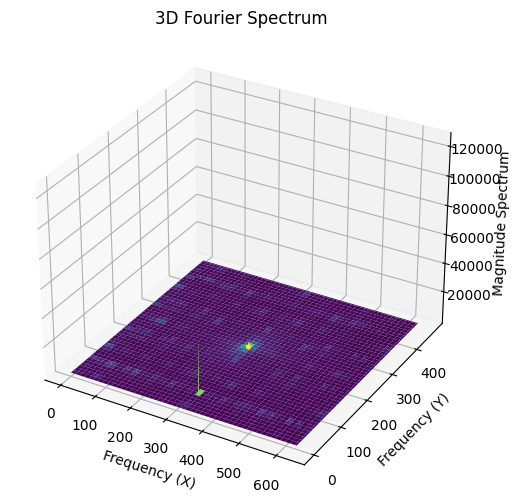

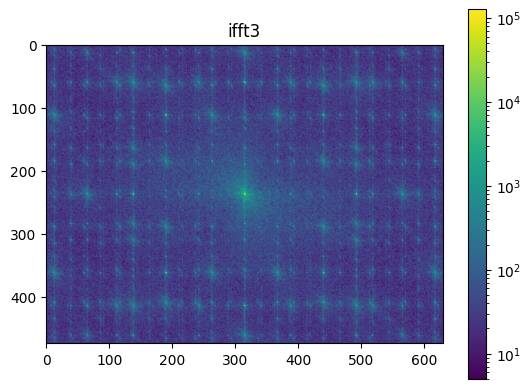

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

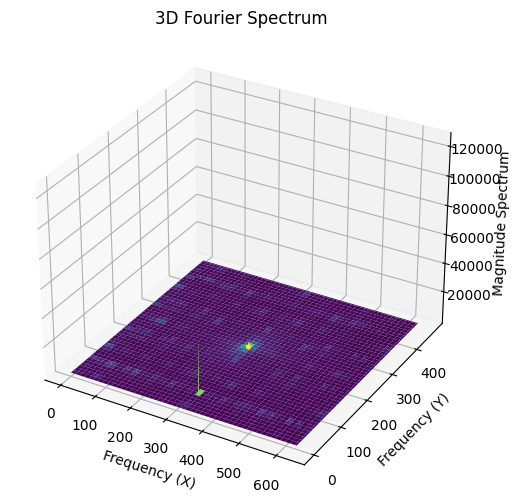

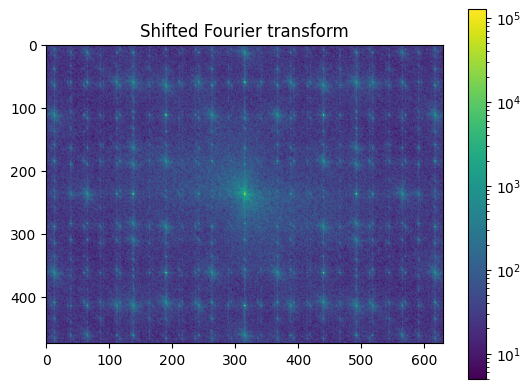

<Figure size 640x480 with 0 Axes>

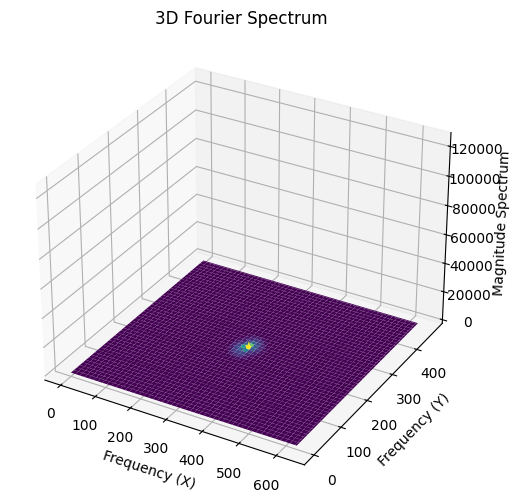

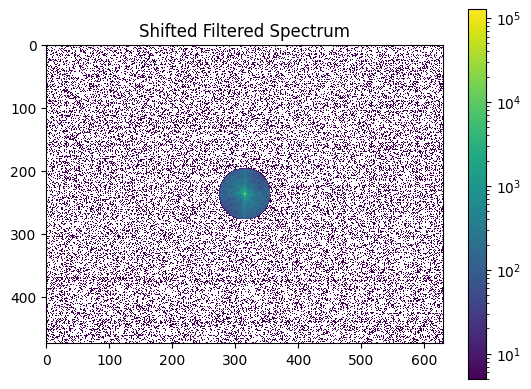

<Figure size 640x480 with 0 Axes>

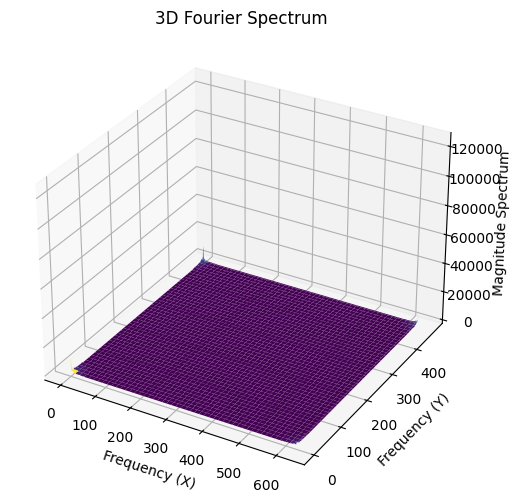

Text(0.5, 1.0, 'Filtered Spectrum')

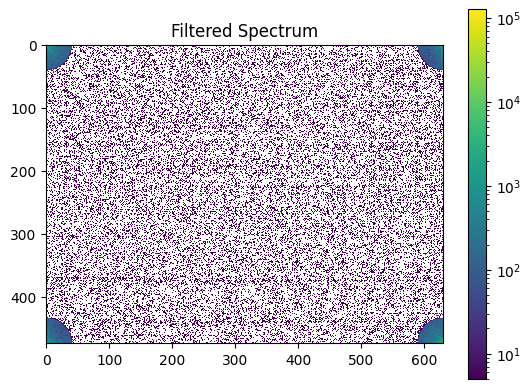

In [65]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

from scipy.fft import fftshift,ifftshift
# `fftshift shift zero-frequency component to center of spectrum`
# `ifftshift`


# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()
im_fft3 = fftshift(im_fft.copy()) 

# shift zero-frequency component to center of spectrum. 
# for example, FFT give us this: `0,1,2,...N/2-1, -N/2, -N/2 +1, ... -2,-1`
# fftshift rearranges the array: `-N/2, -N/2 +1, ... -2,-1, 0,1,2,...N/2-1`
# This step is particularly important for visualization, when you want to 
# visualize the Fourier transform, or perform certain filtering operations,
# where the spatial relationship in the frequency domain is important
 
 
plot_spectrum(im_fft3)
plt.title('ifft3')
plt.figure()


im_fft4= np.zeros(im_fft.shape,dtype=complex)


# Set r and c to be the number of rows and columns of the array.
r, c = im_fft.shape

# im_fft3=im_fft3-im_fft2
for i in range(r//2-100,r//2+100):
    for j in range(c//2-100,c//2+100): # the nested loop iterate through a 
        # square region of size 200x200 pixels centered at the middle of the frequency domain
        
        # the following is our filter: 
        # For each frequency component at coordinates (i, j) in the frequency domain:
        
        # (i-r//2)**2 + (j-c//2)**2 calculates the squared distance from 
        # the center of the image (in the frequency domain) to the current frequency component.
        
        # 40**2 represents the squared radius of the circular filter. 
        # If the squared distance is less than the squared radius, the frequency component is inside the circle.
        if (i-r//2)**2+(j-c//2)**2<40**2:
            # If the frequency component is inside the circular region, 
            # the corresponding coefficient in im_fft4 is set to the value from im_fft3
            im_fft4[i,j]=im_fft3[i,j]
            
im_fft5=ifftshift(im_fft4)

plt.figure()
plot_spectrum(im_fft3)
plt.title('Shifted Fourier transform')

plt.figure()
plot_spectrum(im_fft4)
plt.title('Shifted Filtered Spectrum')

plt.figure()
plot_spectrum(im_fft5)
plt.title('Filtered Spectrum')


Reconstruct the final image

Text(0.5, 1.0, 'Reconstructed Image')

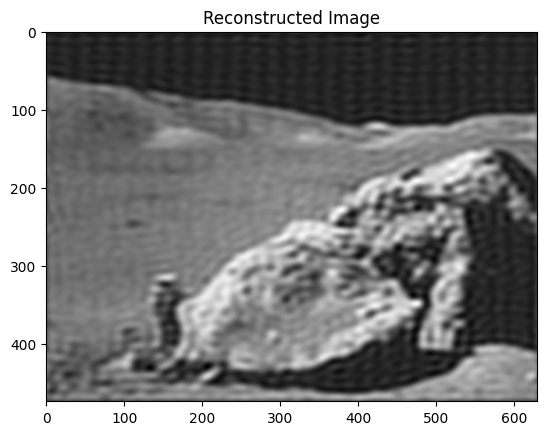

In [28]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = ifft2(im_fft5).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

<a href='#top'>jump to the top</a>

## 6.4 Discrete Gabor transform <a id='section4'></a>

SciPy provides the function `signal.stft()` for calculating the Discrete Gabor transform and `signal.istft()` for calculating the inverse.

The example below shows spectrogram of the frequency.

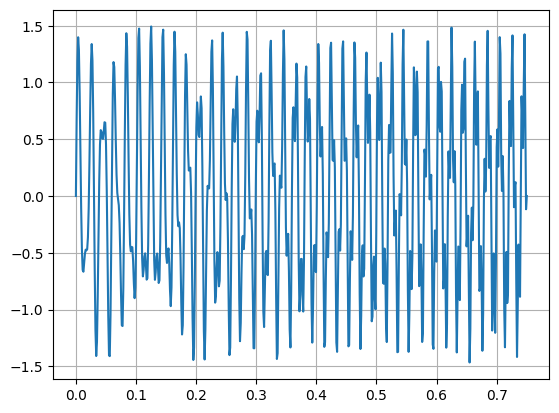

In [45]:
from scipy.fft import fft
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * (x*2+2.0)*np.pi*x
                                            )
plt.plot(x, y)
plt.grid()
plt.show()

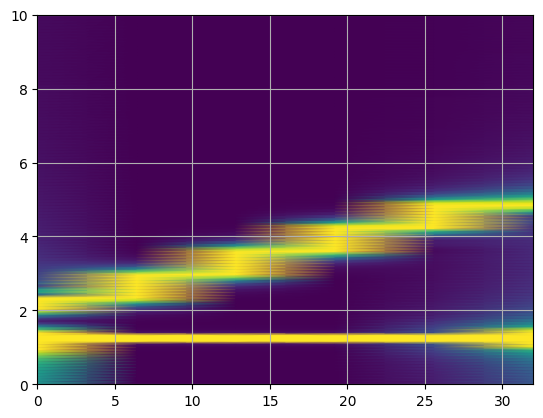

In [47]:
ff,tt,yf = stft(y,20)
# ff: contains the frequency components.
# tt: contains the time components.
# yf: contains the STFT coefficients.

plt.pcolormesh(tt, ff, np.abs(yf), vmin=0, vmax=0.05,shading='gouraud')
plt.grid()
plt.show()

<a href='#top'>jump to the top</a>

## 6.5 Discrete wavelet transform<a id='section5'></a>

In [31]:
!pip install PyWavelets

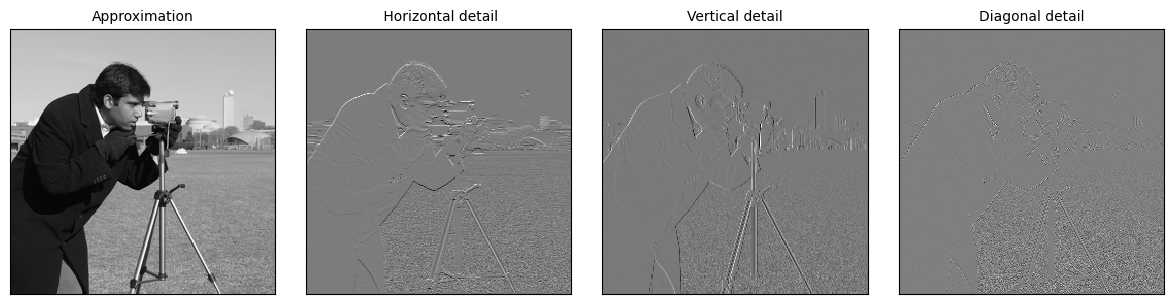

In [36]:
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

# A discrete wavelet transform is applied to `original` image, and the result is
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2 
# LL: approximation, LH: horizontal detail, HL: vertical detail, HH: diagonal detail
fig = plt.figure(figsize=(12, 3))

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

### 2D multilevel decomposition

In [41]:
# Convert tuples to lists, modify elements, and convert back to tuples
LL_list, LH_list, HL_list, HH_list = list(LL), list(LH), list(HL), list(HH)
LH_list[:] = [np.zeros_like(v) for v in LH_list]
HL_list[:] = [np.zeros_like(v) for v in HL_list]
HH_list[:] = [np.zeros_like(v) for v in HH_list]

# Convert lists back to tuples
coeffs2_modified = (tuple(LL_list), (tuple(LH_list), tuple(HL_list), tuple(HH_list)))

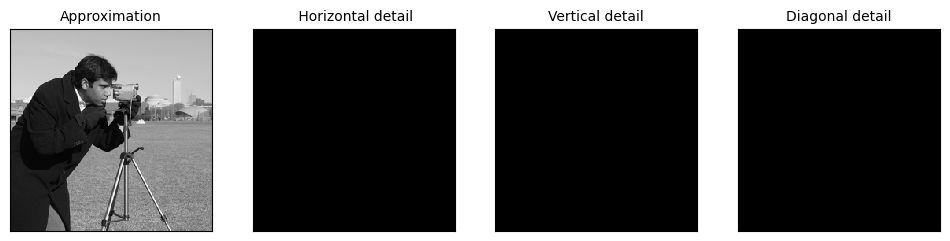

In [44]:
LL, (LH, HL, HH) = coeffs2_modified 
# LL: approximation, LH: horizontal detail, HL: vertical detail, HH: diagonal detail
fig = plt.figure(figsize=(12, 3))

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])


In [42]:
imw=pywt.waverec2(coeffs2_modified, 'haar')

Text(0.5, 1.0, 'Reconstructed Image')

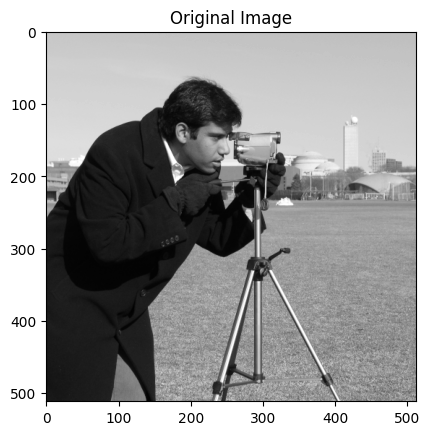

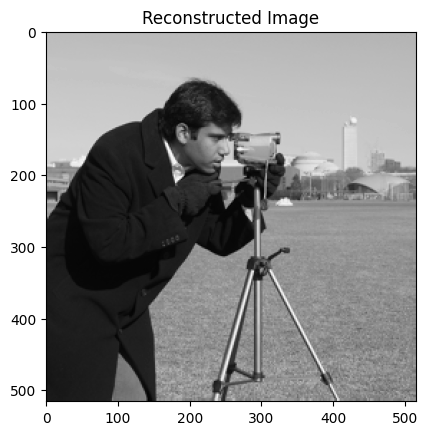

In [43]:
plt.figure()
plt.imshow(original, plt.cm.gray)
plt.title('Original Image')
plt.figure()
plt.imshow(imw, plt.cm.gray)
plt.title('Reconstructed Image')

<a href='#top'>jump to the top</a>